In [1]:
from factor_analyser.FactorBacktester import FactorBacktester
from factor_analyser.FactorFactory import FactorFactory

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
f = pd.read_parquet("./data/factors/factor/1500/data.parq").pivot_table(index="date", columns="symbol", values="factor")
rets = pd.read_pickle("./data/forwad_rets.pkl")

In [3]:
f.head(5)

symbol,000001.SZ,000002.SZ,000004.SZ,000006.SZ,000007.SZ,000008.SZ,000011.SZ,000012.SZ,000014.SZ,000016.SZ,...,603609.SH,603636.SH,603688.SH,603699.SH,603766.SH,603806.SH,603889.SH,603988.SH,603993.SH,603998.SH
date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,0.245411,0.249183,0.299566,0.259969,0.286722,0.272459,0.325664,0.247740,0.302583,0.272721,...,0.254303,-0.305390,0.209438,0.347282,0.284753,0.295960,0.466061,0.276308,0.195917,0.313154
2015-01-06,0.199674,0.247432,0.237358,0.218728,0.299396,0.270573,0.263757,0.263452,0.252947,0.251338,...,0.311005,0.212467,0.261224,0.300589,0.282112,0.334007,0.374298,0.328737,0.225200,0.249233
2015-01-07,0.260156,0.244464,0.312507,0.290344,0.355295,0.280795,0.236996,0.291120,0.347950,0.270674,...,0.279508,0.421440,0.215804,0.111808,0.266558,0.264071,0.106740,0.273365,0.247711,0.289856
2015-01-08,0.232735,0.243114,0.249472,0.299578,0.246340,0.358845,0.251520,0.260275,0.297528,0.244733,...,0.287800,0.257554,0.210676,0.308931,0.281378,0.285214,0.183594,0.327495,0.275588,0.278580
2015-01-09,0.213479,0.214714,0.286549,0.240772,0.251144,0.254860,0.234473,0.291791,0.290842,0.299898,...,0.288997,0.341876,0.230655,0.263665,0.300232,0.300396,0.215055,0.313759,0.289590,0.235341


# Demo of FactorBacktester Usage

In [4]:
mng = FactorBacktester(f, rets, forward_time=0, annualization=250)

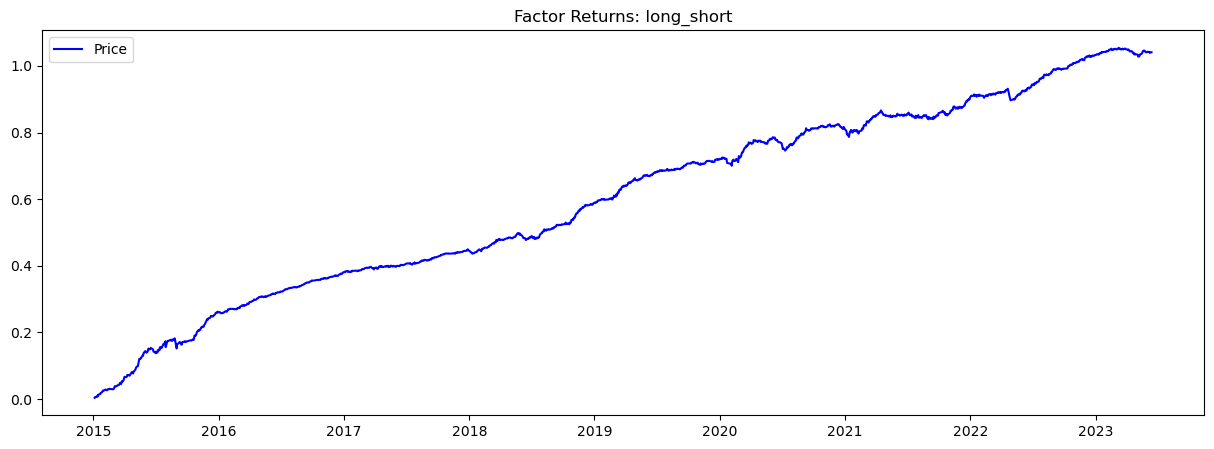

+---------------+-------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
|               | Mean  | Volatility | Sharpe Ratio | Skewness | Excess Kurtosis | VaR (0.05) | CVaR (0.05) |  Min   |  Max  | Max Drawdown |   Peak   |  Bottom  | Recovery |
+---------------+-------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
| factor_return | 0.127 |   0.033    |    3.821     |  -0.544  |      7.677      |   -0.003   |   -0.004    | -0.018 | 0.012 |    -0.039    | 20200604 | 20200710 | 20200818 |
+---------------+-------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+


2015-01-05    0.003832
2015-01-06    0.000360
2015-01-07    0.002157
2015-01-08    0.000020
2015-01-09   -0.000423
                ...   
2023-06-07   -0.000625
2023-06-08   -0.001976
2023-06-09    0.001756
2023-06-12    0.000210
2023-06-13    0.000000
Length: 2054, dtype: float64

In [5]:
pnl = mng.get_factor_rets(method="long_short", plot=True, evaluation=True)
pnl

2015-01-05    0.044451
2015-01-06    0.010292
2015-01-07    0.093831
2015-01-08    0.030770
2015-01-09    0.004819
                ...   
2023-06-07   -0.047982
2023-06-08   -0.076507
2023-06-09    0.090916
2023-06-12    0.032830
2023-06-13         NaN
Length: 2054, dtype: float64

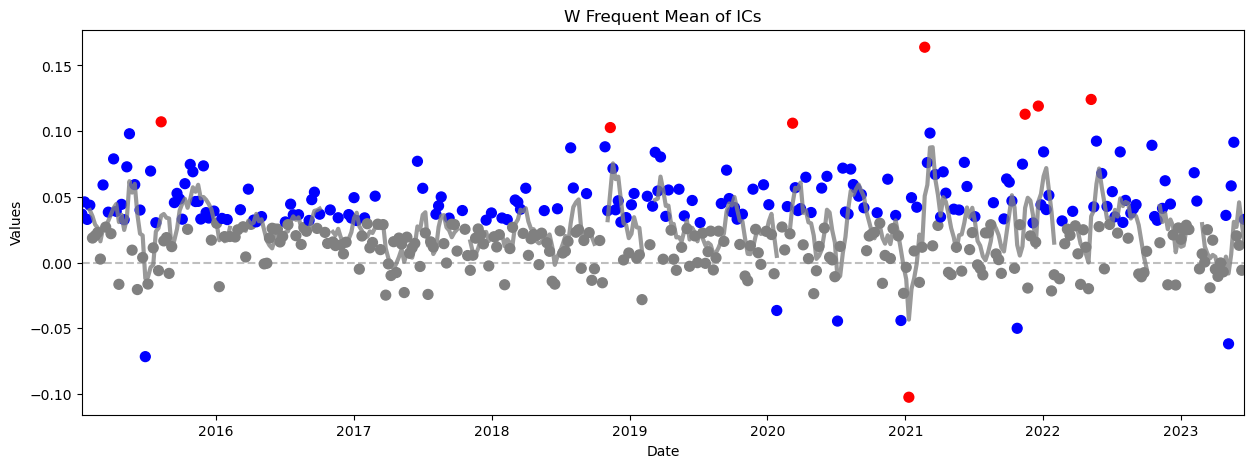

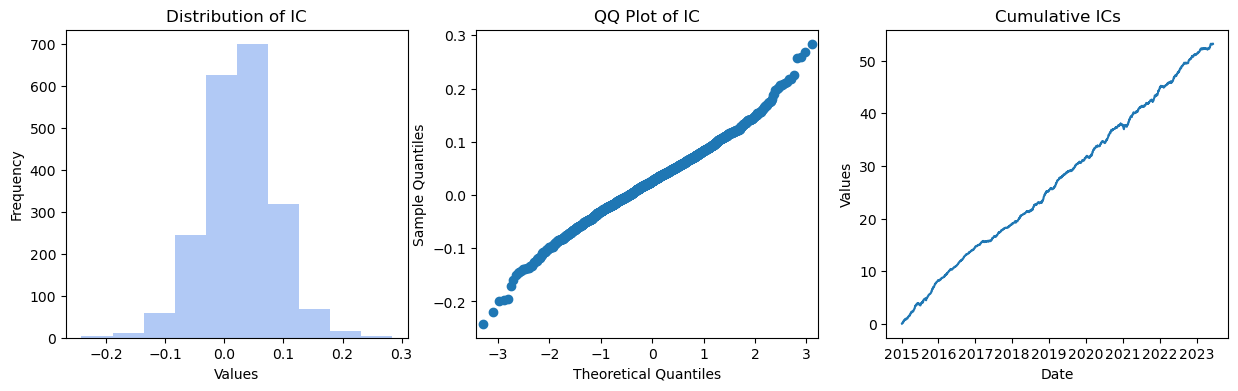

In [6]:
ic = mng.get_ic(plot=True)
ic

+----+--------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
|    |  Mean  | Volatility | Sharpe Ratio | Skewness | Excess Kurtosis | VaR (0.05) | CVaR (0.05) |  Min   |  Max  | Max Drawdown |   Peak   |  Bottom  | Recovery |
+----+--------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
| 1  | -0.260 |   0.304    |    -0.854    |  -0.794  |     12.900      |   -0.028   |   -0.051    | -0.137 | 0.184 |    -0.957    | 20150611 | 20230605 |   NaT    |
| 2  | -0.078 |   0.309    |    -0.252    |  -0.839  |     12.882      |   -0.028   |   -0.051    | -0.143 | 0.186 |    -0.836    | 20150611 | 20230607 |   NaT    |
| 3  | -0.053 |   0.311    |    -0.169    |  -0.835  |     11.844      |   -0.028   |   -0.051    | -0.144 | 0.178 |    -0.803    | 20150611 | 20230524 |   NaT    |
| 4  | -0.

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
2015-01-05,0.013494,0.017590,0.015943,0.014356,0.024718,0.021928,0.017641,0.023110,0.019633,0.021904,0.019310,0.022518,0.027090,0.017991,0.017206,0.021972,0.019165,0.026890,0.022701,0.023935
2015-01-06,-0.002470,0.001057,0.000781,0.001430,-0.000762,0.003385,0.003265,0.001623,-0.005081,-0.003803,0.000224,0.000896,0.000284,0.000950,0.001320,-0.000615,0.000865,0.001064,-0.001054,0.001827
2015-01-07,-0.001688,-0.006991,-0.009277,-0.010988,-0.005395,-0.014709,-0.004764,-0.009507,-0.009393,-0.009900,-0.003256,-0.003028,-0.007352,-0.000466,-0.004878,-0.008134,-0.000467,0.001898,-0.001902,0.000318
2015-01-08,-0.008054,-0.009129,-0.008977,-0.007558,-0.011765,-0.013514,-0.008687,-0.011210,-0.011166,-0.007305,-0.012979,-0.007980,-0.009264,-0.008440,-0.012267,-0.009789,-0.008280,-0.009197,-0.008940,-0.006216
2015-01-09,-0.012354,-0.010983,-0.007762,-0.013058,-0.009260,-0.006463,-0.013574,-0.013976,-0.010545,-0.008750,-0.009452,-0.011208,-0.008478,-0.012844,-0.014852,-0.013488,-0.005917,-0.008841,-0.009963,-0.012578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-07,0.003411,-0.004394,-0.001508,0.003299,-0.001238,0.000557,-0.000088,0.000795,-0.002836,-0.000151,-0.002183,0.000772,-0.002431,-0.003338,-0.005421,-0.000269,-0.003681,-0.000568,-0.001023,0.001271
2023-06-08,0.003836,0.006534,0.004115,0.002022,0.004322,0.002617,0.003017,0.009201,0.003612,0.001970,0.000202,0.006626,0.000807,0.004070,-0.003310,0.000617,-0.000735,-0.000167,0.004265,-0.001963
2023-06-09,0.005510,0.002835,-0.000788,0.001015,0.007545,0.007003,0.007630,0.004262,0.005811,0.006696,0.002501,0.008528,0.005036,0.006343,0.008172,0.006000,0.009089,0.009634,0.007703,0.007080
2023-06-12,0.001120,0.006595,0.003901,0.003921,0.008925,0.004992,0.007217,0.005936,0.002179,0.003610,0.004910,0.009538,0.005448,0.004222,0.004593,0.003991,0.006521,0.003813,0.004191,0.003302


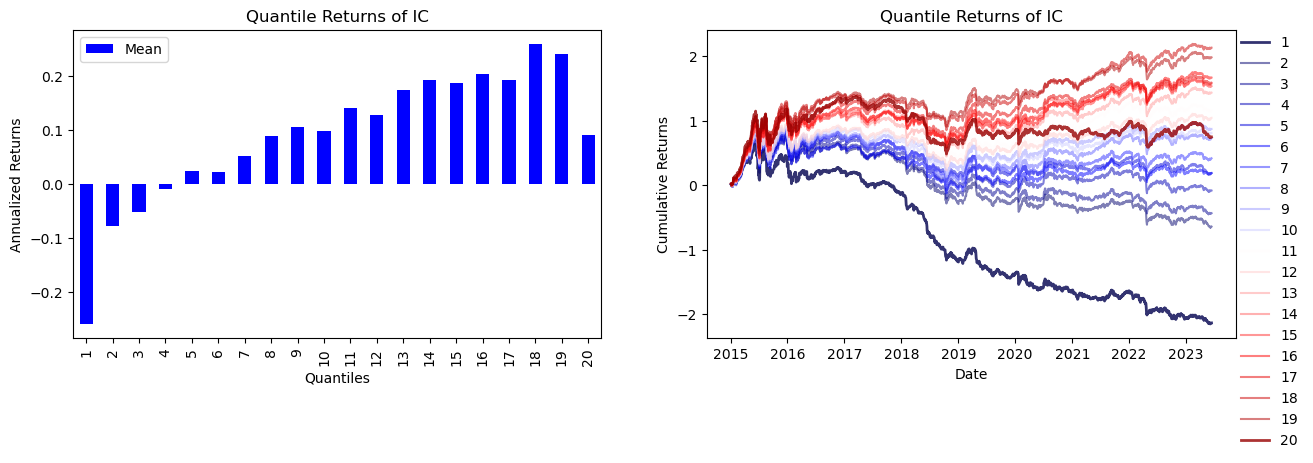

In [7]:
quantile_rets = mng.get_quantile_rets(quantiles=20,plot=True,evaluation=True)
quantile_rets

# Demo of FactorFactory Usage

In [8]:
ff = FactorFactory(rets, forward_time=0)

rank_ic: 0.0259, rank_ic_std: 0.0610, rank_ic_ir: 0.4247, null_percentage: 5.329614724790636
+----+--------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
|    |  Mean  | Volatility | Sharpe Ratio | Skewness | Excess Kurtosis | VaR (0.05) | CVaR (0.05) |  Min   |  Max  | Max Drawdown |   Peak   |  Bottom  | Recovery |
+----+--------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
| 1  | -0.262 |   0.305    |    -0.857    |  -0.794  |     12.900      |   -0.028   |   -0.051    | -0.137 | 0.184 |    -0.957    | 20150611 | 20230605 |   NaT    |
| 2  | -0.079 |   0.310    |    -0.253    |  -0.839  |     12.882      |   -0.028   |   -0.051    | -0.143 | 0.186 |    -0.836    | 20150611 | 20230607 |   NaT    |
| 3  | -0.053 |   0.313    |    -0.169    |  -0.835  |     11.844      |   -0.028 

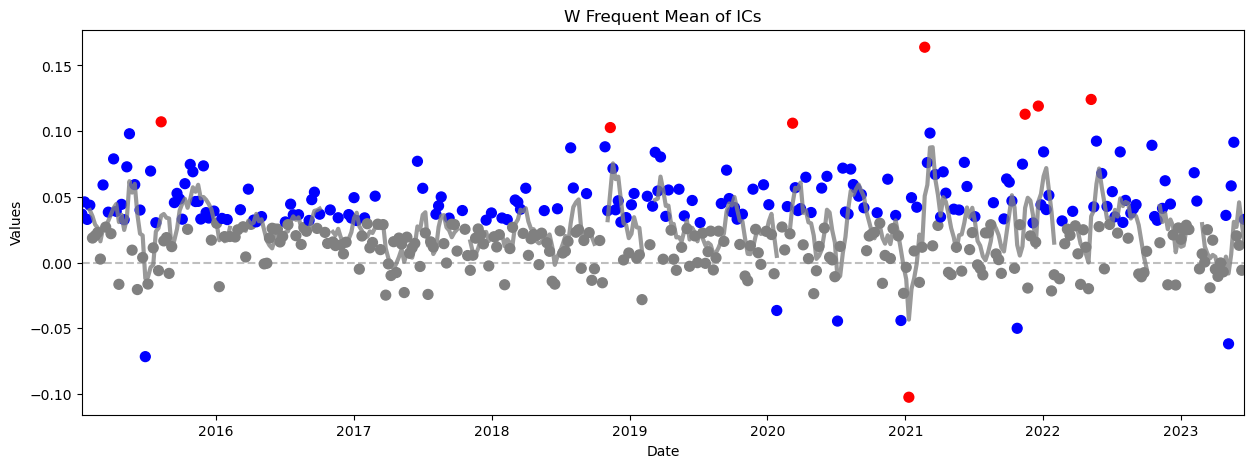

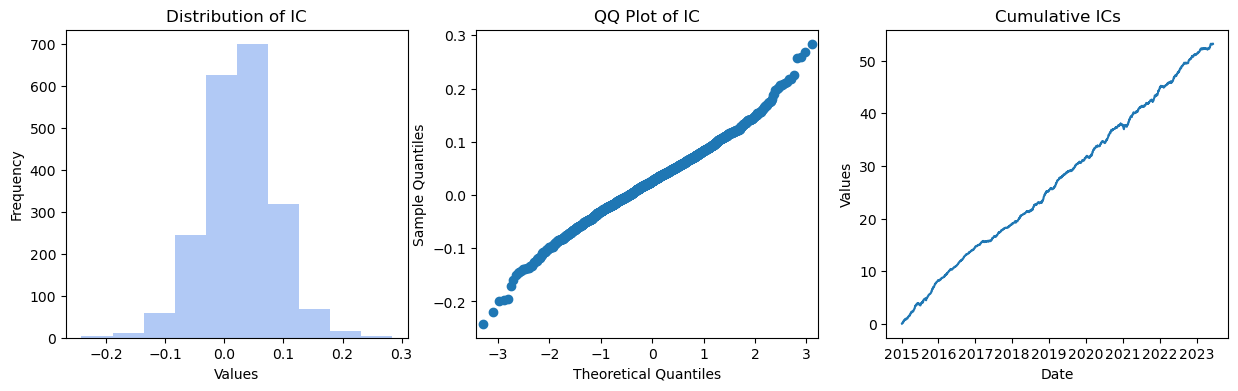

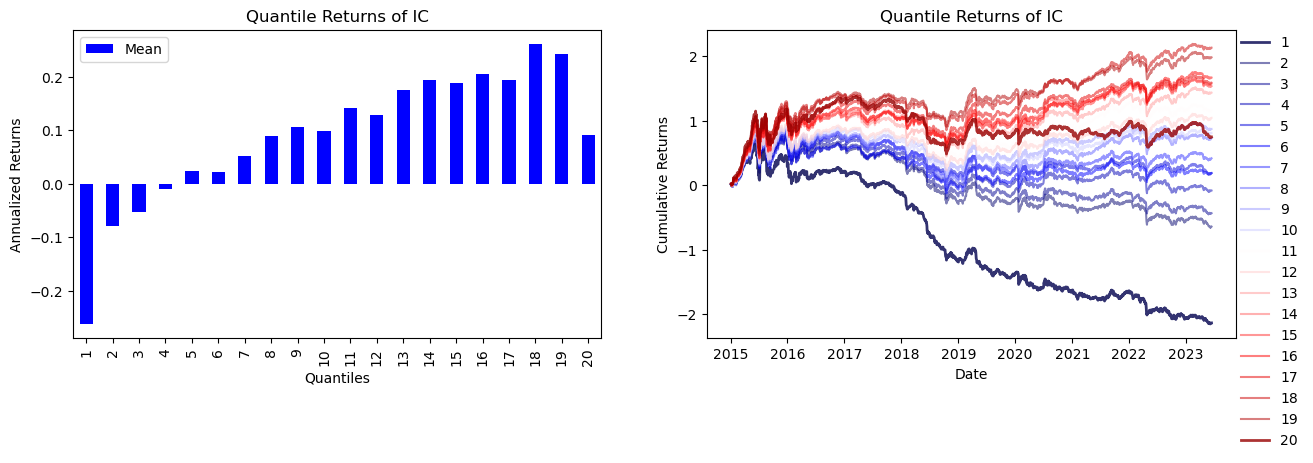

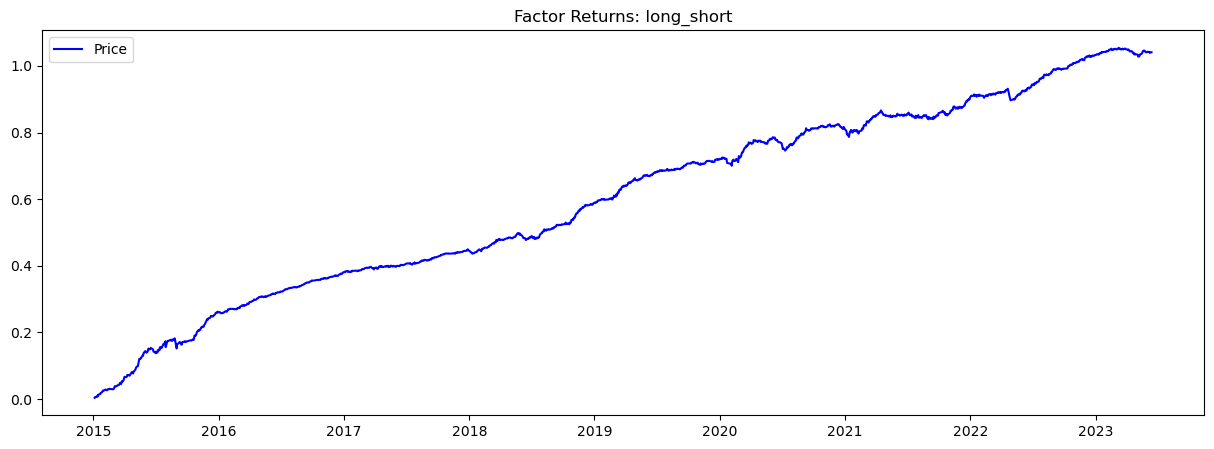

+---------------+-------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
|               | Mean  | Volatility | Sharpe Ratio | Skewness | Excess Kurtosis | VaR (0.05) | CVaR (0.05) |  Min   |  Max  | Max Drawdown |   Peak   |  Bottom  | Recovery |
+---------------+-------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
| factor_return | 0.128 |   0.033    |    3.836     |  -0.544  |      7.677      |   -0.003   |   -0.004    | -0.018 | 0.012 |    -0.039    | 20200604 | 20200710 | 20200818 |
+---------------+-------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+


In [9]:
ff.evaluate_factor(f,num_quantiles=20,factor_ret_method="long_short")

In [10]:
ic,ic_std,icir,null_pct = ff.evaluate_factor_icir(f,ic_thresh=0.02,icir_thresh=0.3,return_only=False)

In [11]:
ff.evaluate_factor_extension_stats(f,window = 10, min_periods= 2)

10Mean:


10RankMean:


10ExpMean:


10Std:


10Skew:


10Kurt:


10Median:


10Q25:


10Q75:


In [12]:
f2 = f.sub(f.mean(1),axis = 0)**2
ic,ic_std,icir,null_pct = ff.evaluate_factor_icir(f2,ic_thresh=0.02,icir_thresh=0.3,return_only=False)
ff.save_factor(f2,factor_name='f^2',time_point= '1500',root_path = "./data/factors/")

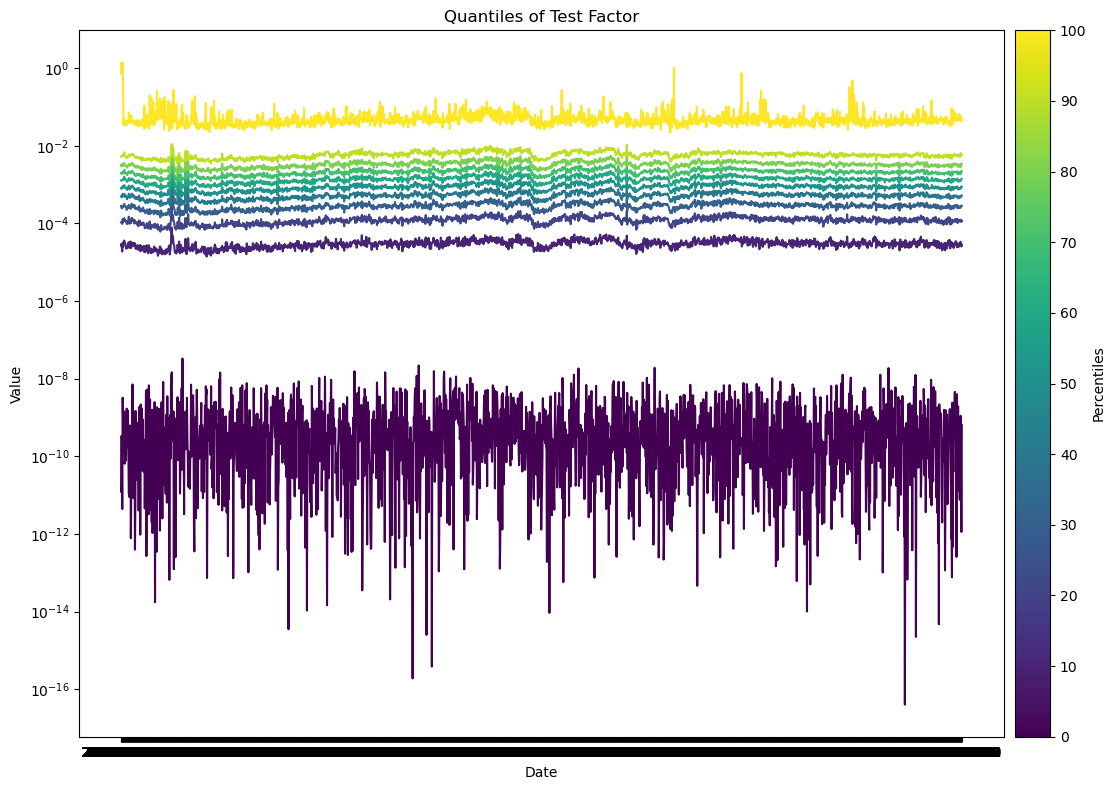

In [13]:
ff.plot_factor_quantiles(f2, log_scale=True)

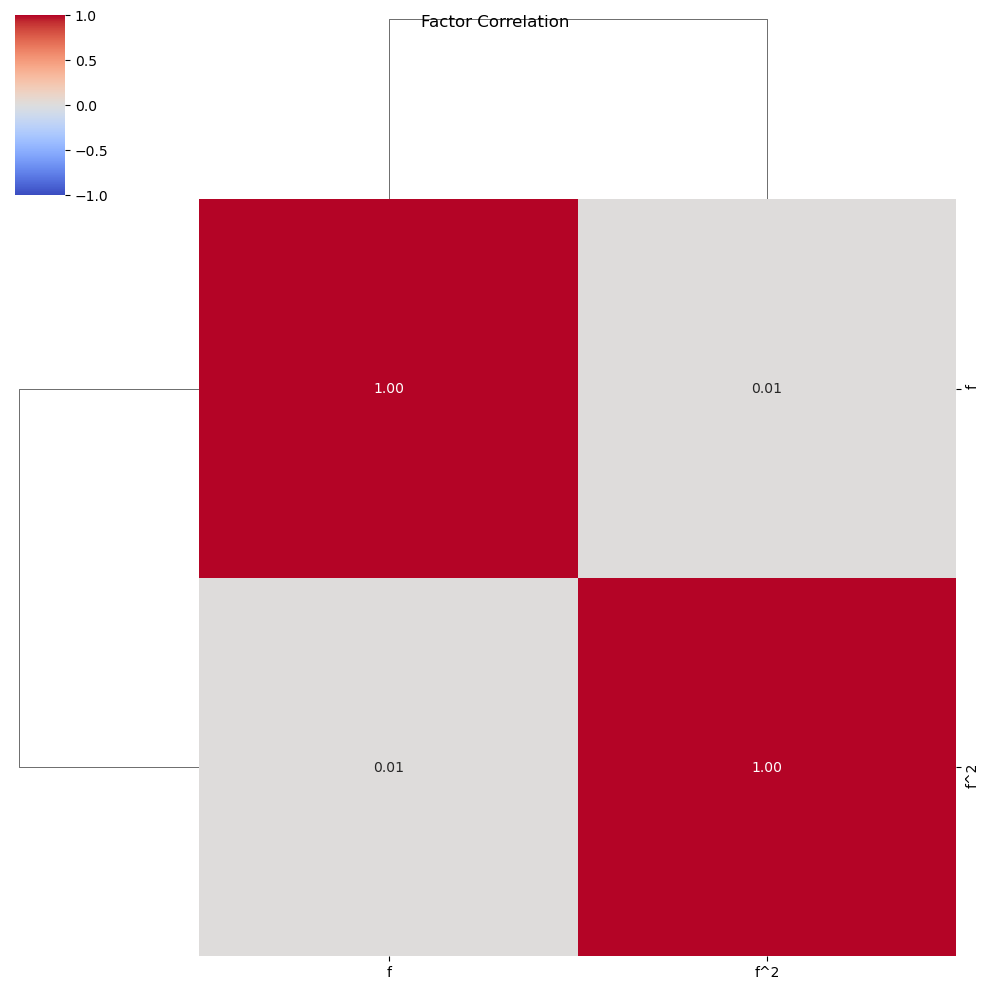

In [14]:
corr = ff.factor_correlation_analysis([f,f2],factor_names=['f','f^2'],plot_type='clustermap',figsize=(8,8))

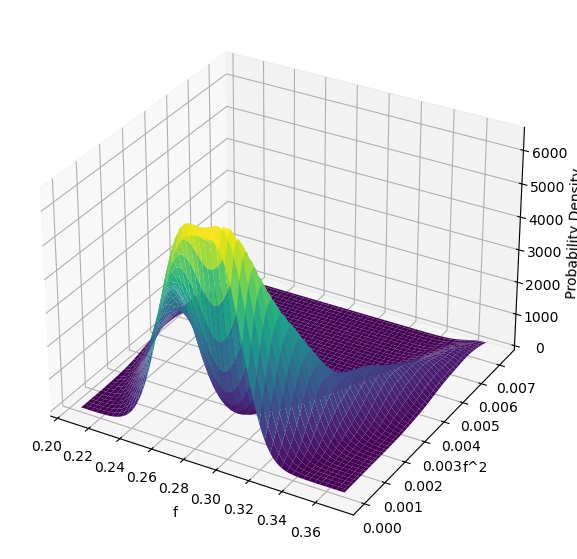

In [15]:
plot_date = '2021-06-30'
ff.plot_joint_pdf_with_outlier_removal(f.loc[plot_date],f2.loc[plot_date],name1='f',name2 = 'f^2',lower_bound=0.05,upper_bound=0.95)

rank_ic: 0.0259, rank_ic_std: 0.0610, rank_ic_ir: 0.4245, null_percentage: 5.329614724790636
+----+--------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
|    |  Mean  | Volatility | Sharpe Ratio | Skewness | Excess Kurtosis | VaR (0.05) | CVaR (0.05) |  Min   |  Max  | Max Drawdown |   Peak   |  Bottom  | Recovery |
+----+--------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
| 1  | -0.259 |   0.305    |    -0.848    |  -0.796  |     12.894      |   -0.028   |   -0.051    | -0.137 | 0.184 |    -0.956    | 20150611 | 20230605 |   NaT    |
| 2  | -0.078 |   0.310    |    -0.251    |  -0.832  |     12.882      |   -0.028   |   -0.051    | -0.143 | 0.186 |    -0.836    | 20150611 | 20230607 |   NaT    |
| 3  | -0.054 |   0.313    |    -0.172    |  -0.847  |     11.767      |   -0.028 

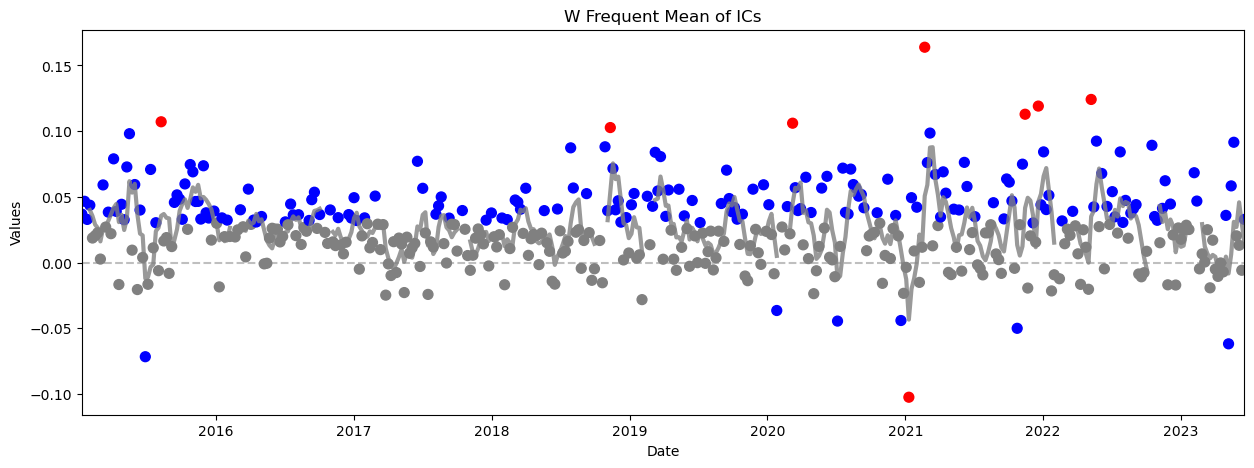

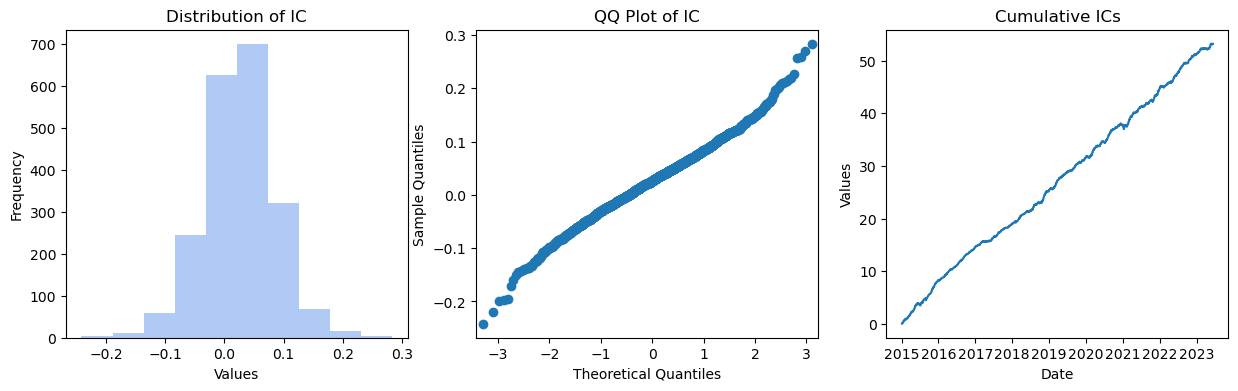

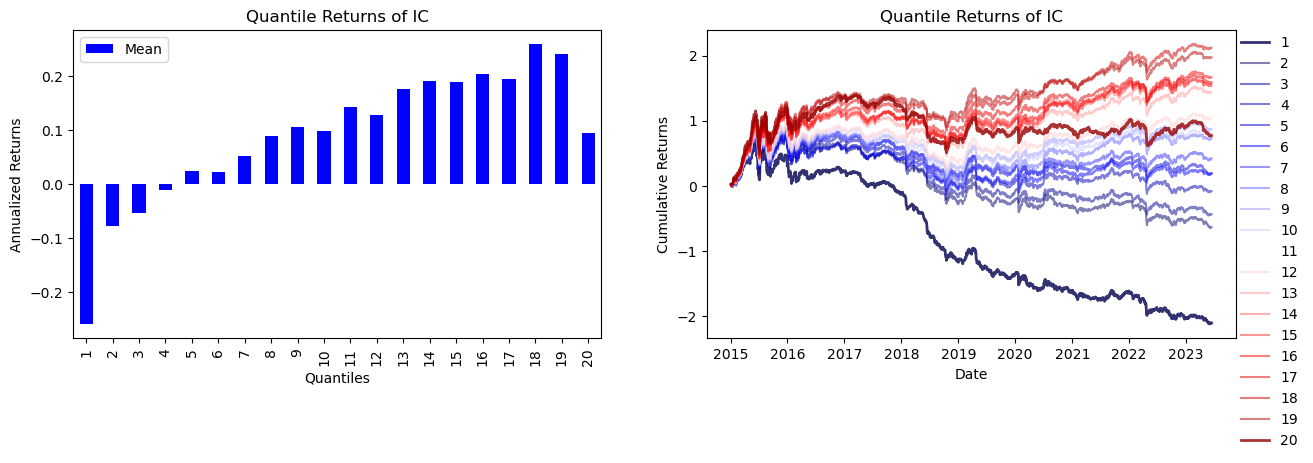

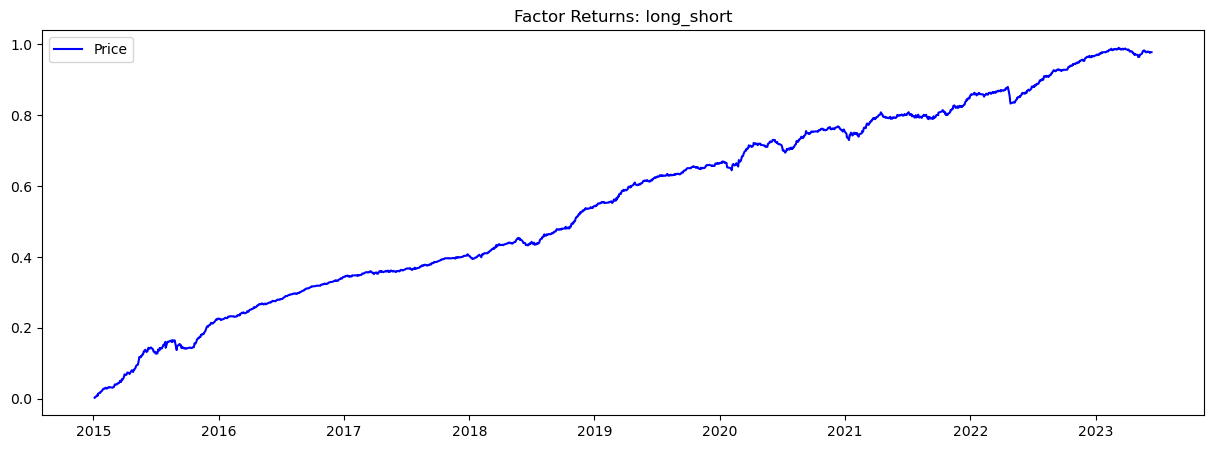

+---------------+-------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
|               | Mean  | Volatility | Sharpe Ratio | Skewness | Excess Kurtosis | VaR (0.05) | CVaR (0.05) |  Min   |  Max  | Max Drawdown |   Peak   |  Bottom  | Recovery |
+---------------+-------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+
| factor_return | 0.120 |   0.033    |    3.632     |  -0.530  |      6.342      |   -0.003   |   -0.004    | -0.017 | 0.010 |    -0.046    | 20220420 | 20220428 | 20220630 |
+---------------+-------+------------+--------------+----------+-----------------+------------+-------------+--------+-------+--------------+----------+----------+----------+


In [16]:
e_f = ff.compute_daily_residuals_simple(f,f.sub(f.mean(1),axis = 0)**2)
ff.evaluate_factor(e_f)